In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
path = "C:\\Users\\User\\Documents\\GitHub\\Springboard-DSC\\Take home challenges\\ultimate_challenge\\logins.json"
json_file = pd.read_json(path)
json_file['count'] = json_file.index

In [267]:
json_file['login_time'] = pd.to_datetime(json_file.login_time,unit='s')
json_file = json_file.set_index('login_time')

AttributeError: 'DataFrame' object has no attribute 'login_time'

In [131]:
json_resampled = json_file.resample("15T").count()
#days of the week
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
#get weekday and convert to day of week
json_resampled = json_resampled.reset_index()
json_resampled['dayofweek'] = json_resampled['login_time'].dt.dayofweek


In [132]:
json_resampled['dayofweek'] = json_resampled['dayofweek'].map(days)
#concatenate date and time
json_resampled['time'] = json_resampled['login_time'].dt.time

#### Theory
At this point my theory is that login patterns might be different on weekends versus weekdays. I would therefore like to visualize weekday and weekend data independently to report about the trends I noticed separately 

In [152]:
#weekend data
weekends = json_resampled[json_resampled['dayofweek'].isin(['Sat','Sun'])]
weekdays = json_resampled[~json_resampled['dayofweek'].isin(['Sat','Sun'])]

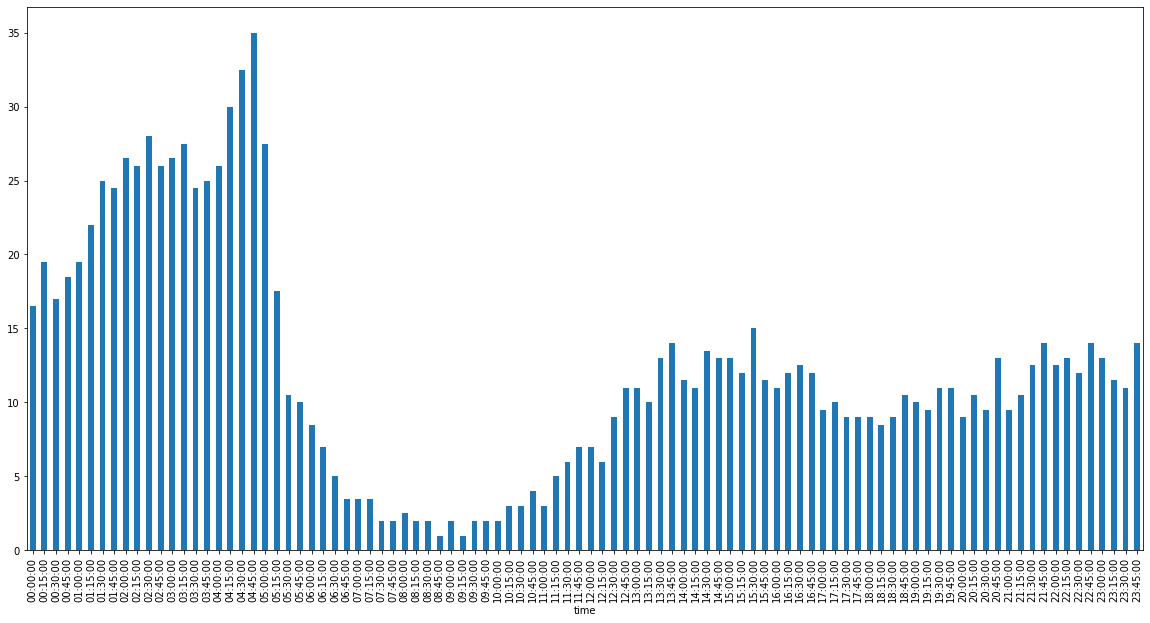

In [157]:
ax= weekends.groupby('time')['count'].median().plot(kind='bar',figsize=(20,10))


{'whiskers': [<matplotlib.lines.Line2D at 0x1f3ff842948>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3ff842b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3ff6b2248>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3ff182a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3ff5fb748>],
 'means': []}

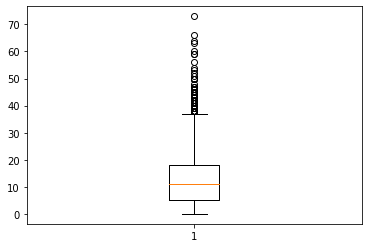

In [161]:
plt.boxplot(weekends['count'])

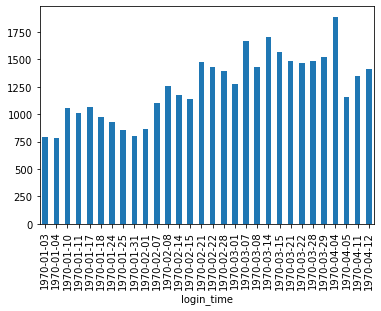

In [189]:
#is demand increasing
weekends.groupby(weekends['login_time'].dt.date)['count'].sum().plot(kind='bar')

#### Analysis - Weekend data
We observe logins peaking very early in the morning, with the absolute peak being at around 4am. After this logins decrease, with the lowest number being at around 8am.

One assumption that comes to mind is that people are more likely to login to hire a taxi during the early mornings on weekends because there is a greater demand from people looking to get a ride back home after a night out. This also assumes that people in this area are substantially more active at night and in the early mornings of the day that they are during any other time interval. 

Demand may tapper off after 4am because these are the hours that people spend resting/sleeping with demand going back up and staying fairly consistent after 12pm.

With the boxplot we see that the average number of logins is around the ten mark with outliers in the upper end peaking at a little over 70 logins within a 15 minute interval. 

From the second plot we see can observe that the the 4th of April had the highest demand from any other weekend. Since demand is shown to be increasing on weekends on a month to month basis it seems intuitive to expect the peak to be closer to the last weekend in the dataset.

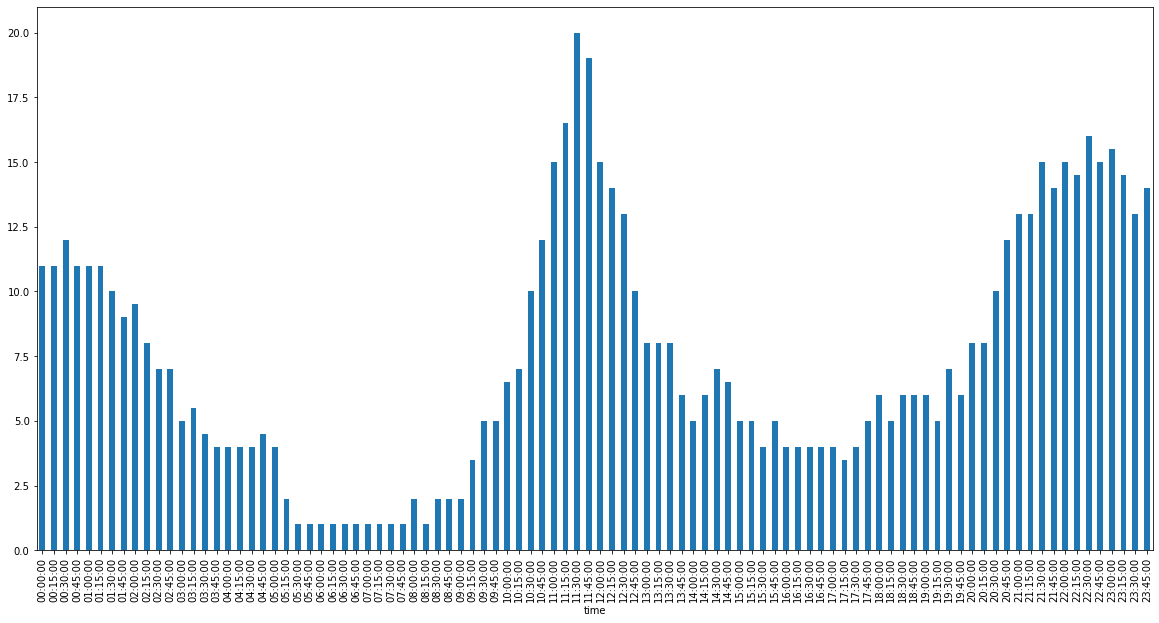

In [158]:
#weekday data trends
ax_two= weekdays.groupby('time')['count'].median().plot(kind='bar',figsize=(20,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3fb16cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3fb15fcc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3fb17ad08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3fb12a348>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3fb12fc88>],
 'means': []}

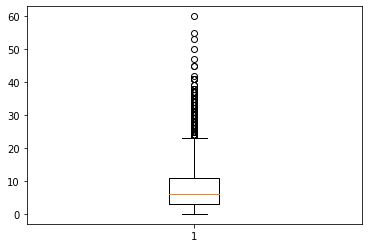

In [162]:
plt.boxplot(weekdays['count'])

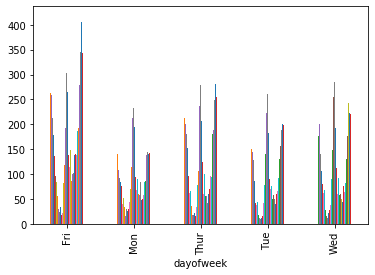

In [201]:
#are trends the same on all weekdays
weekdays.groupby(['dayofweek','time'])['count'].sum().unstack().plot(kind='bar',legend=None)

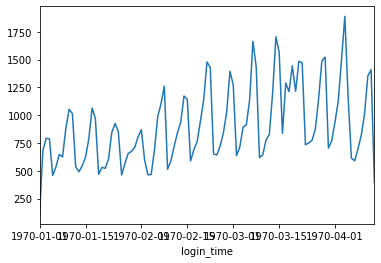

In [202]:
#is demand increasing
json_resampled.groupby(json_resampled['login_time'].dt.date)['count'].sum().plot(kind='line')


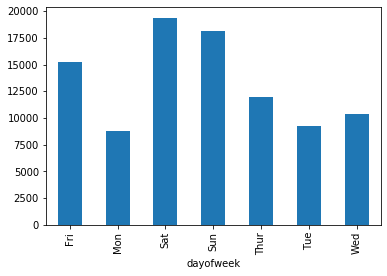

In [207]:
json_resampled.groupby('dayofweek')['count'].sum().plot(kind='bar')

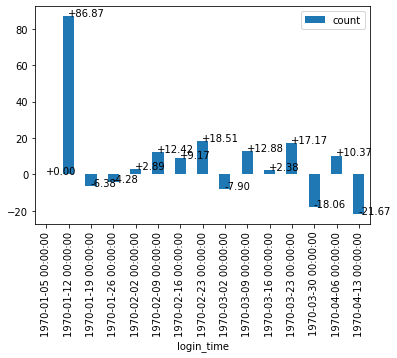

In [239]:
#week on week growth
newbar = pd.DataFrame(json_resampled.groupby(json_resampled['login_time'].dt.date)['count'].sum())
ax = (json_resampled.resample('W-Mon',on='login_time').sum().pct_change()*100).plot(kind='bar')
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_rotation


#### Analysis - Weekdays
Looking at this chart along with the weekend chart raises questions about the accuracy of weekend data. It seems counterintuitive that people login more to this site between 9 am and 1pm on weekdays and during the early mornings on weekends. 

Logins during the peak interval on weekends is about 75% higher than the peak interval on weekdays, this along with the lower mean shown in the box plot may indicate lower demand on weekdays than on weekends.

From the second bar plot we can observe while the daily trends remain the same throughout all weekdays we can observe visibly higher demand on Fridays. 

The line chart indicates growing overall demand with the highs representing Saturdays and the lows probably representing Mondays where demand appears to be generally lower than other days - as indicated in the third bar plot.

Lastly, from the week on week barplot we observe a generally positive weekly growth rate averaging at around 8%. This is positive news as it seems to support as assumption that demand for the platform is growing atleast in this particular location

## Question 2 - Experiment and metrics design

1. I would specifically look at how long people wait for drivers during peak hours in both Gotham and Metropolis and compare the waiting time to the average waiting time prior to the implementation of the experiment. I would reason that if the experiment was successful more drivers would move between cities based on demand. Therefore in hours where there is more demand in a particular city I would expect to see more driver activity in that city which should bring down the average waiting time for passengers

2. The experiment would be an A/B test. I would expect to see a substantial enough change to warrant concluding that experiment is either successful or not. I would use the t-test with the null value being that the experiment yields no difference in waiting time and the alternative being there is a decrease in waiting time. I would look for a value under 0.05 to determine whether the decrease is statistically significant.

However, its important to note that statistical significance is not synonymous with practical significance. So for example I would want to know what level of improvement would warrant potentially increasing the venture's costs

## Question 3 - Predictive modeling

In [32]:
import json
path_two = "C:\\Users\\User\\Documents\\GitHub\\Springboard-DSC\\Take home challenges\\ultimate_challenge\\ultimate_data_challenge.json"
file = open(path_two)
jsonfile = json.load(file)
filedf = pd.DataFrame(jsonfile)
file.close()

In [33]:
#find columns with null values
filedf.isnull().any()[lambda x: x]

avg_rating_of_driver    True
phone                   True
avg_rating_by_driver    True
dtype: bool

In [34]:
#fill na values
filedf.avg_rating_of_driver.fillna(0,inplace=True)
filedf.phone.fillna('unknown',inplace=True)
filedf.avg_rating_by_driver.fillna(0,inplace=True)

In [36]:
#converting all date time columns to datetime format
filedf['signup_date'] = pd.to_datetime(filedf.signup_date)
filedf['last_trip_date'] = pd.to_datetime(filedf.last_trip_date)

In [37]:
#how many users are active after 6 months
filedf.loc[(filedf['trips_in_first_30_days'] > 0),'retained'] = 'Yes'
filedf.loc[(filedf['trips_in_first_30_days'] == 0),'retained'] = 'No'

In [38]:
yes = (len(filedf[filedf['retained']=='Yes'])/len(filedf))*100
no = (len(filedf[filedf['retained']=='No'])/len(filedf))*100
sums = [yes,no]

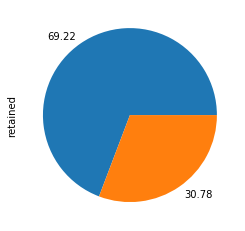

In [39]:
filedf.retained.value_counts().plot(kind='pie',labels=sums)

#### Analysis
In this case blue represents the percentage of people who were retained while orange represents those who were not retained

In [44]:
#find months delta between last trip date and signup date
filedf["months_active"] = ((filedf["last_trip_date"] - filedf["signup_date"]).map(lambda x: round(x.days/30)))
#label yes if 6 or over, no if not
filedf.loc[(filedf['months_active'] >=6), '6month_retained'] = 'Yes'
filedf.loc[(filedf['months_active'] < 6), '6month_retained'] = 'No'

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,months_active,6month_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Yes,5,No
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,No,3,No
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,Yes,0,No
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,Yes,6,Yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,Yes,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,No,4,No
49996,Astapor,1,2014-01-24,0.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,Yes,0,No
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,No,4,No
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,Yes,0,No


#### Thoughts
At this point I am already starting to form a few assumptions.

I can envision a scenario where a user chooses to use Ultimate's services to replace what s/he would normally use a means of transportation to go to work. I therefore want to compare the average weekday_pct of users who have been active after 6 months of having signed up against those who have not

In [48]:
active = filedf[filedf['6month_retained'] == 'Yes']
active.mean()

trips_in_first_30_days     3.950205
avg_rating_of_driver       4.308472
avg_surge                  1.078053
surge_pct                  9.589459
ultimate_black_user        0.525760
weekday_pct               61.515736
avg_dist                   4.700034
avg_rating_by_driver       4.747338
months_active              6.000000
dtype: float64

In [49]:
inactive = filedf[filedf['6month_retained'] == 'No']
inactive.mean()

trips_in_first_30_days     2.107207
avg_rating_of_driver       3.807612
avg_surge                  1.074427
surge_pct                  8.773865
ultimate_black_user        0.361875
weekday_pct               60.865781
avg_dist                   5.908994
avg_rating_by_driver       4.760138
months_active              2.783140
dtype: float64

#### Thoughts
From this I can see that users who are active for 6 months and longer seem to give drivers a higher rating on average. It would be interesting to test the assumption of whether part of the reason users aren't retained is due to their perception on the drivers they get

In [56]:
filedf.head(2)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,months_active,6month_retained
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Yes,5,No
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,No,3,No


In [76]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
log_reg = LogisticRegression(penalty='l1')

In [75]:
y = filedf['6month_retained']
X = filedf.drop(['6month_retained','months_active','retained','signup_date','last_trip_date'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=100)
le = preprocessing.LabelEncoder()
filedf['phone'] = le.fit_transform(filedf['phone'])
filedf['city'] = le.fit_transform(filedf['city'])
filedf['ultimate_black_user'] = le.fit_transform(filedf['ultimate_black_user'])
log_reg.fit(X_train,y_train)
predicts = log_reg.predict(X_test)
print(classification_report(y_test,predicts))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

          No       0.91      1.00      0.95     13621
         Yes       0.29      0.00      0.01      1379

    accuracy                           0.91     15000
   macro avg       0.60      0.50      0.48     15000
weighted avg       0.85      0.91      0.86     15000



In [79]:
X.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

#### Process
After running the first logistic regression model I realised that I was dealing with unbalanced data so chose to try a random forest classifier

In [113]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
strat = filedf['6month_retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=strat)
#looking for the best parameters
params = {
    'n_estimators':[i for i in range(1,201,10)],
    'max_depth':[i for i in range(1,10,1)],
    'max_features':[i for i in range(1,10,1)],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier()
randomsearch = RandomizedSearchCV(rf,param_distributions=params,random_state=2)

In [114]:
randomsearch.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [115]:
bestparams = randomsearch.best_params_
class_weight = dict({'No':1, 'Yes':10})
rc = RandomForestClassifier(**bestparams,random_state=10,class_weight=class_weight)
rc.fit(X_train,y_train)
preds = rc.predict(X_test)
from sklearn.metrics import f1_score
score = f1_score(y_test,preds,average='macro')
score

0.5690044413066144

Text(0.5, 87.0, 'Predicted')

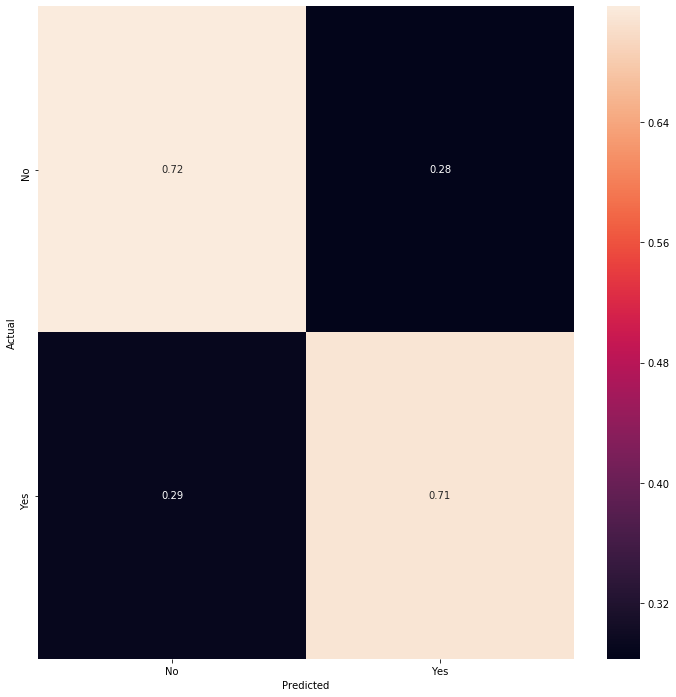

In [116]:
labels = ['No','Yes']
conf = confusion_matrix(y_test,preds)
#normalize data
cm = conf.astype('float')/conf.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

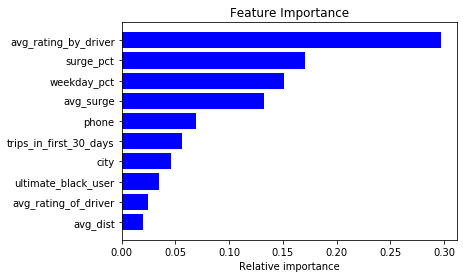

In [118]:
#feature importance
features = X.columns
importances = rc.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

#### Analysis

I opted to use a logistic regression model as this model can be uased when we have a classification problem and the outcome (what we are trying to predict) has two possible options/outocomes. This model is fairly simple to use, understand and interpret abut generally performs better in instances where a linear relationship exists between the features and the outcomes being predicted.


Afternoticing that I was dealing with imbalanced classes I opted to use the random forest classifier, mostly because it is also fairly easy to understand and interpret, can be tweaked to handle imbalanced classes by changing the class weights and you can also see which features play a role in predicting a given outcome.

Using this model, Ultimate can predict with a fair degree of accuracy which users are more likely to stay active and look at the most important features to determine what to optimize in order to try and increase a customer's propensity to stay on the platform longer.

To put it in practical terms, it appears as though how drivers rate their passengers has an impact on whether they are active after 6 months. To increase the ratings drivers give out to passengers it maybe worth while finding out why drivers give certain passengers lower ratings and then using that information to offer passengers guidance on how to deal with drivers. Drivers could also give the reason why they gave a lower rating and then each time a passenger gets a lower rating, they get a notification when they order their next ride giving them personalised tips/advice on how to increase their ratings. Not every passenger will be incentivised to take this advice to heart but it is an experiment that; i.) costs relatively little to implement and ii.) might lead to an increase in retention